# Scan conversion

#### Objective

Transform a series of line into an image that geometrically makes sense:

![](images/7317421464689659964.jpg)

#### Litterature

* Interesting http://www.k-wave.org/documentation/scanConversion.php 
* https://www.researchgate.net/publication/265425106_Signal_Processing_Overview_of_Ultrasound_Systems_for_Medical_Imaging/figures?lo=1
* https://www.researchgate.net/publication/259614810_Programmable_ultrasound_scan_conversion_on_a_media-processor-based_system

In [1]:
# General use
import numpy as np
import matplotlib.pyplot as plt
# For the scan conversion part
import math
from scipy import signal
from scipy.interpolate import griddata
from scipy.signal import decimate, convolve

In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
data = np.load("data/probeX/outputs/pre_sc.npz")["img"]

In [19]:
Val = np.average(data) 

def CreateSC(RawImgData):
    LenLinesC = np.shape(RawImgData)[1]
    NbLinesC = np.shape(RawImgData)[0]
    SC = np.zeros((LenLinesC,LenLinesC))
    SC += 1
    maxAngle = 60.0
    step = maxAngle/(NbLinesC+1)
    CosAngle = math.cos(math.radians(30))
    Limit = LenLinesC*CosAngle

    points = []
    values = []

    for i in range(LenLinesC):
        for j in range(LenLinesC):
            if (  (j > LenLinesC/2 + i/(2*CosAngle)) or  (j < LenLinesC/2 - i/(2*CosAngle)) ):
                SC[i][j] = 0
                points.append([i,j])
                values.append(0)
            if (  (i > Limit) ):
                if ( (i**2 + (j-LenLinesC/2) ** 2) > LenLinesC**2):
                    SC[i][j] = 0 
                    points.append([i,j])
                    values.append(0)
    for i in range(NbLinesC):
        PointAngle = i*step-30
        COS = math.cos(math.radians(PointAngle))
        SIN = math.sin(math.radians(PointAngle))
        for j in range(LenLinesC):

            X = (int)( j*COS)
            Y = (int)(LenLinesC/2 - j*SIN)
            SC[X][Y] = RawImgData[i][j]
            points.append([X,Y])
            values.append(RawImgData[i][j])

    values = np.array(values,dtype=np.int)
    
    return SC,values,points,LenLinesC

# What are we getting?

### Not all elements will be represented..

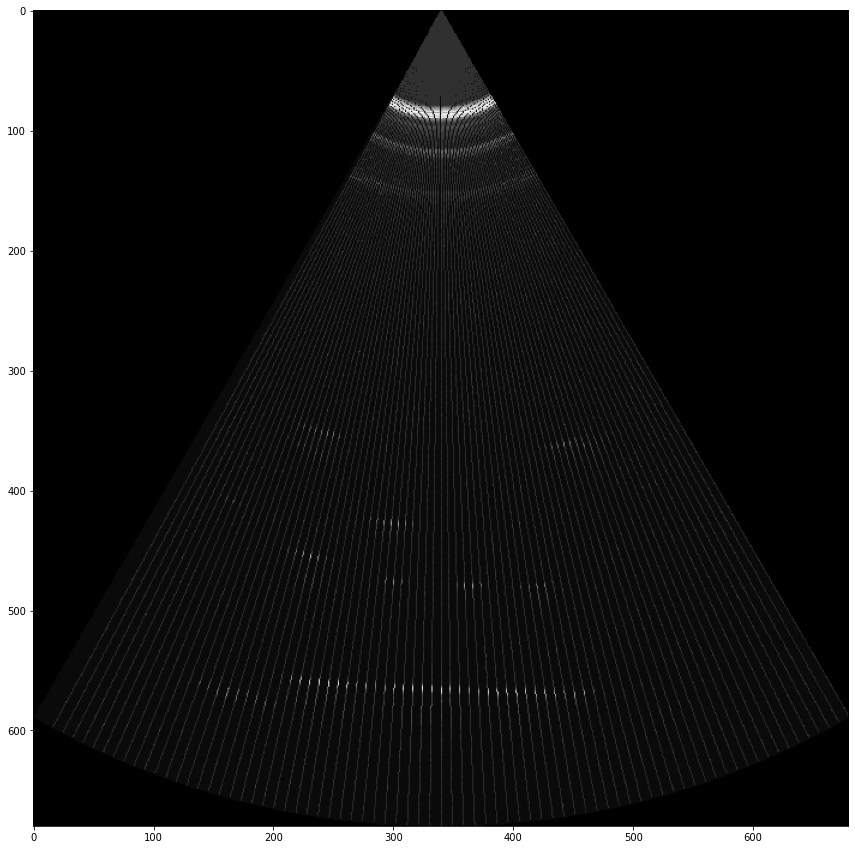

In [20]:
SCH,valuesH,pointsH,LenLinesCH = CreateSC(data)
plt.figure(figsize=(15,15))
plt.imshow(np.sqrt(SCH),cmap=plt.get_cmap('gray')) 

# So what we'll do is to interpolate the values using

### from scipy.interpolate import __griddata__

In [21]:
grid_xH, grid_yH = np.mgrid[0:LenLinesCH:1, 0:LenLinesCH:1]
grid_z1H = griddata(pointsH, valuesH, (grid_xH, grid_yH), method='linear')

/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


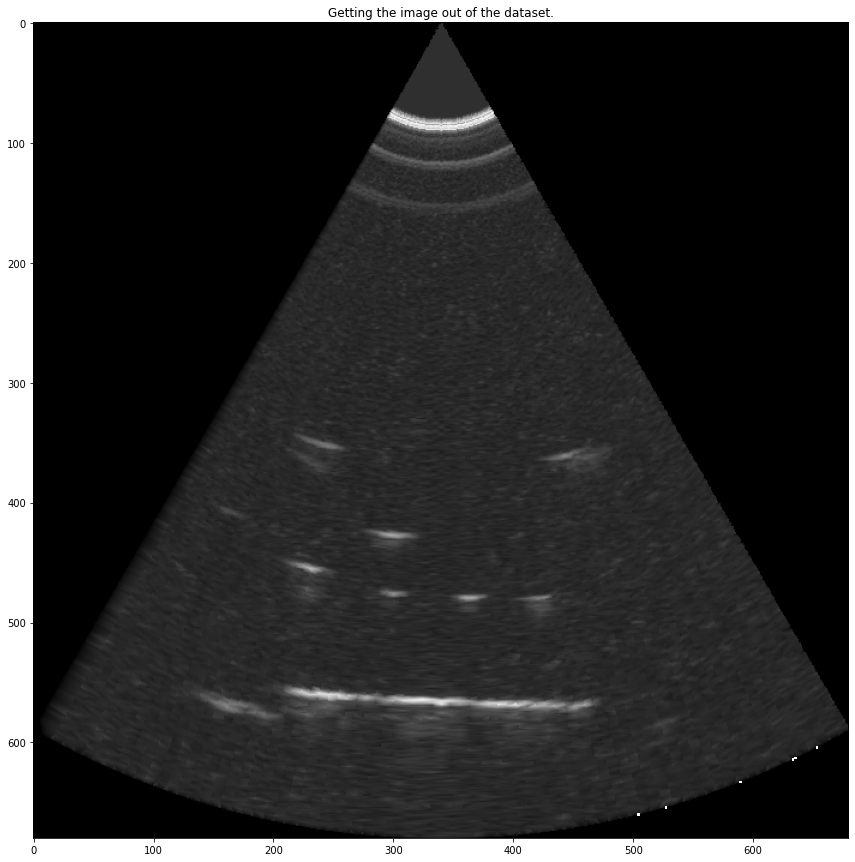

In [22]:
plt.figure(figsize=(15,15))
plt.imshow(np.sqrt(grid_z1H),cmap=plt.get_cmap('gray')) 
plt.title("Getting the image out of the dataset.")    
plt.show()